### Data Prep


In [1]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline

In [2]:
!pip install --upgrade pandas


     ---------------------------------------- 11.6/11.6 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~andas.libs\\msvcp140-fa0758dedafbbe194d3ee96e3dc2b9a3.dll'
Consider using the `--user` option or check the permissions.



In [3]:
df_apr14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-apr14.csv")
df_may14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-may14.csv")
df_jun14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-jun14.csv")
df_jul14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-jul14.csv")
df_aug14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-aug14.csv")
df_sept14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-sep14.csv")
df_janjun15 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-janjune-15.csv")


dfs_to_concat = [df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sept14]

# Concatenate DataFrames along rows (axis=0) and reset index
df = pd.concat(dfs_to_concat, ignore_index=True)

# Display the resulting DataFrame
print(df)



                  Date/Time      Lat      Lon    Base
0          4/1/2014 0:11:00  40.7690 -73.9549  B02512
1          4/1/2014 0:17:00  40.7267 -74.0345  B02512
2          4/1/2014 0:21:00  40.7316 -73.9873  B02512
3          4/1/2014 0:28:00  40.7588 -73.9776  B02512
4          4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                     ...      ...      ...     ...
4534322  9/30/2014 22:57:00  40.7668 -73.9845  B02764
4534323  9/30/2014 22:57:00  40.6911 -74.1773  B02764
4534324  9/30/2014 22:58:00  40.8519 -73.9319  B02764
4534325  9/30/2014 22:58:00  40.7081 -74.0066  B02764
4534326  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[4534327 rows x 4 columns]


In [4]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [7]:
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [8]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

            Date_time      Lat      Lon    Base  Month  Weekday  Day  Hour  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  April  Tuesday    1     0   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  April  Tuesday    1     0   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  April  Tuesday    1     0   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  April  Tuesday    1     0   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  April  Tuesday    1     0   

   Minute  
0      11  
1      17  
2      21  
3      28  
4      33  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [10]:
df.describe(include = 'all')

AttributeError: 'Index' object has no attribute '_format_flat'

                            Date_time           Lat           Lon     Base  \
count                         4534327  4.534327e+06  4.534327e+06  4534327   
unique                            NaN           NaN           NaN        5   
top                               NaN           NaN           NaN   B02617   
freq                              NaN           NaN           NaN  1458853   
mean    2014-07-11 18:50:50.578151424  4.073926e+01 -7.397302e+01      NaN   
min               2014-04-01 00:00:00  3.965690e+01 -7.492900e+01      NaN   
25%               2014-05-28 15:18:00  4.072110e+01 -7.399650e+01      NaN   
50%               2014-07-17 14:45:00  4.074220e+01 -7.398340e+01      NaN   
75%               2014-08-27 21:55:00  4.076100e+01 -7.396530e+01      NaN   
max               2014-09-30 22:59:00  4.211660e+01 -7.206660e+01      NaN   
std                               NaN  3.994991e-02  5.726670e-02      NaN   

            Month   Weekday           Day          Hour        

In [11]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

In [12]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

AttributeError: 'Index' object has no attribute '_format_flat'

Day     1     2     3     4     5     6     7     8     9     10  ...    22  \
Hour                                                              ...         
0     3247  2480  3415  2944  2786  4623  3715  2882  2708  3351  ...  2852   
1     1982  1600  2176  1718  1567  2932  2326  1672  1757  2167  ...  1662   
2     1284  1109  1434  1217  1047  1902  1533  1147  1246  1495  ...  1207   
3     1331  1442  1489  1449  1278  1599  1622  1509  1501  1466  ...  1503   
4     1458  1897  1578  1737  1648  1584  1793  1921  1911  1614  ...  1984   

Day     23    24    25    26    27    28    29    30    31  
Hour                                                        
0     2605  3277  2442  3887  5304  4224  2732  2439  2209  
1     1608  2090  1525  3123  3712  2711  1862  1547  1407  
2     1163  1480  1098  2087  2407  1894  1442  1135  1107  
3     1465  1520  1472  1840  2098  1846  1717  1436   935  
4     1994  1825  1972  1770  1759  1916  1990  1864   788  

[5 rows x 31 colum

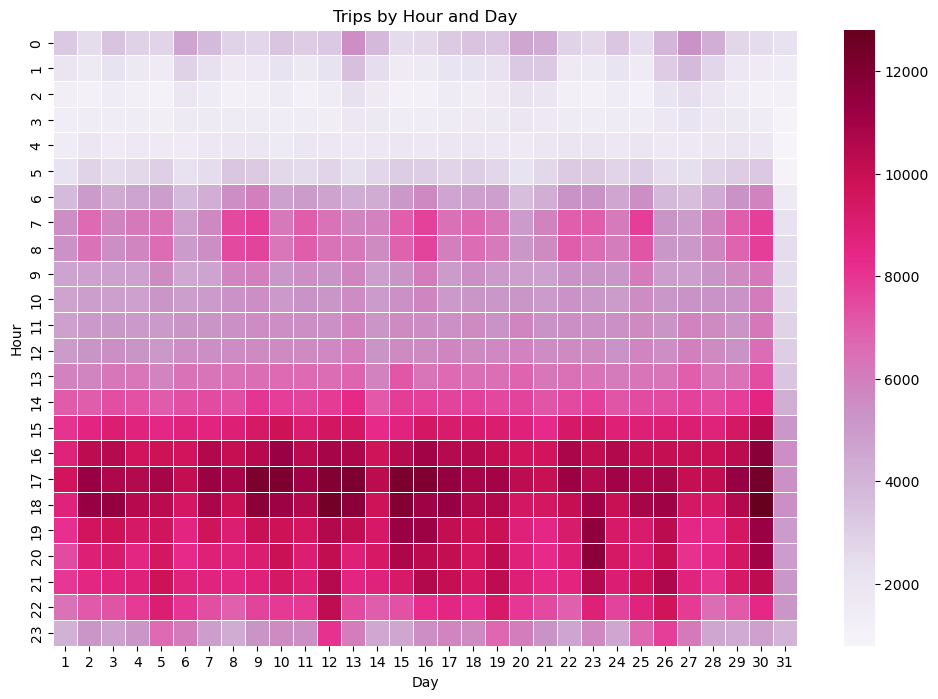

In [13]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.PuRd, linewidth = .5)
ax.set(title="Trips by Hour and Day");

### Analysing the results
We see that the number of trips in increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.

It corresponds to the time where employees finish their work and go home.

### Heat Map by Hour and week day

In [14]:
df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

AttributeError: 'Index' object has no attribute '_format_flat'

Weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Hour                                                                   
0           6237       7644      9293   13716     27633   32877    6436
1           3509       4324      5290    8163     19189   23015    3737
2           2571       3141      3719    5350     12710   15436    2938
3           4494       4855      5637    6930      9542   10597    6232
4           7548       7511      8505    8806      6846    6374    9640

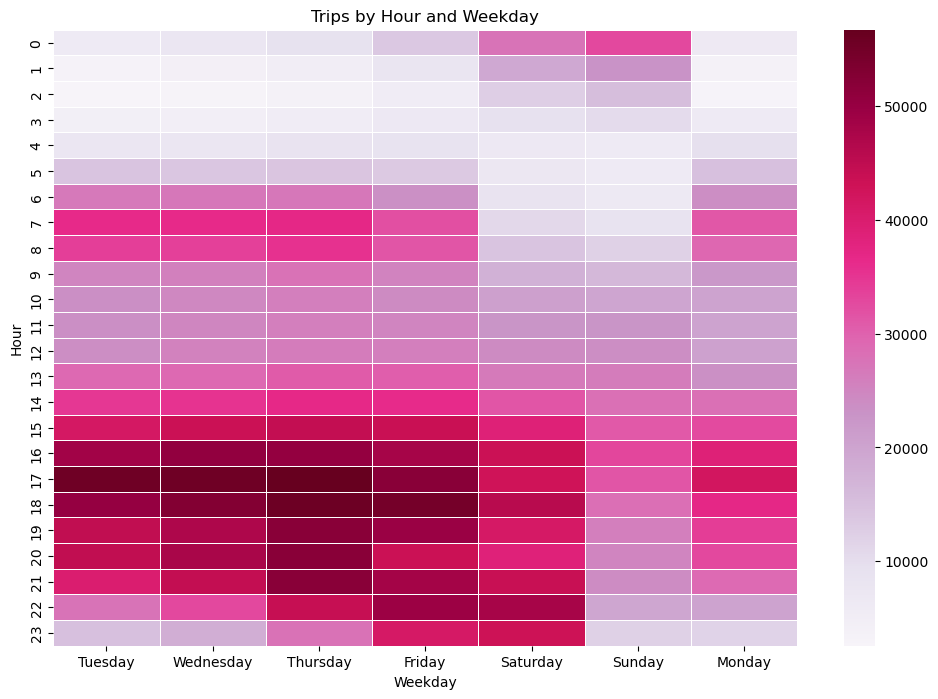

In [15]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.PuRd, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

#### Examining the outcomes
###### It is evident that during the weekdays, Monday through Friday, there is a greater volume of trips between 16:00 and 21:00. It illustrates our points from the first heatmap even more clearly.
###### Up to 23:00 on Friday, there are a lot of journeys, and this trend continues early on Saturday. It coincides with when people leave work to go out to supper or drinks in the lead-up to the weekend.
###### The similar tendency is evident on Saturdays: people prefer to go out at night, and there are still a lot of journeys made till early Sunday.



### Heatmap by Day and Month

In [16]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

AttributeError: 'Index' object has no attribute '_format_flat'

Month    April      May     June     July   August  September
Day                                                          
1      14546.0  23375.0  15967.0  21228.0  32353.0    19961.0
2      17474.0  24235.0  17503.0  26480.0  28678.0    28831.0
3      20701.0  22234.0  22674.0  21597.0  23146.0    32631.0
4      26714.0  13918.0  22831.0  14148.0  24952.0    38360.0
5      19521.0  17859.0  28371.0  10890.0  28094.0    42319.0

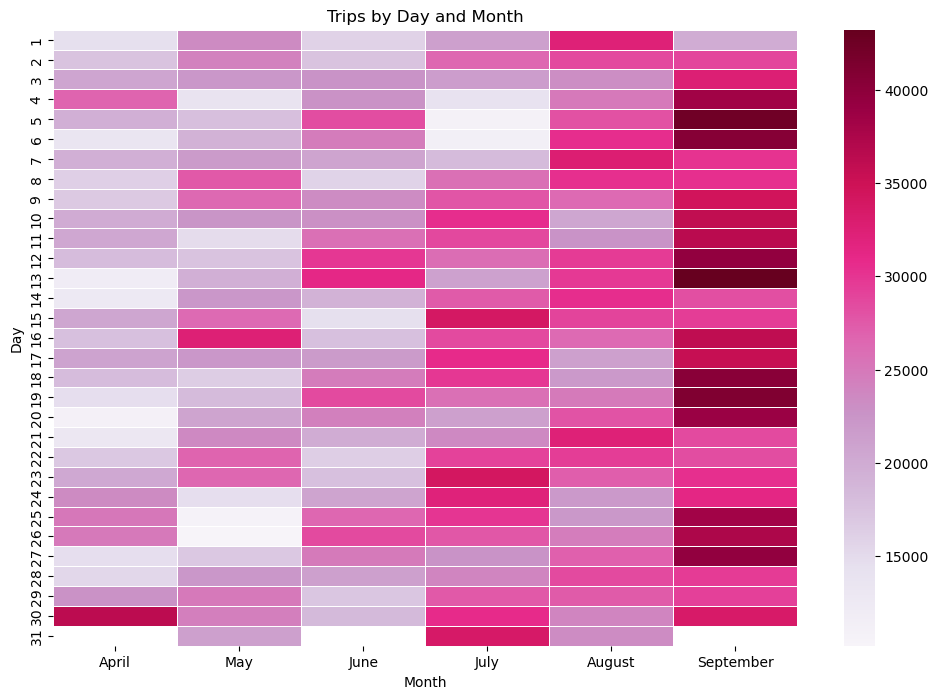

In [17]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.PuRd, linewidth = .5)
ax.set(title="Trips by Day and Month");

#### Examining the outcomes
##### Given that the number of rides is rising each month, we may conclude that Uber was engaged in a continuous improvement process from April to September of 2014.
##### The visualisation shows us a dark patch that represents April 30. Compared to the rest of the month, that day's travel count was exceptionally high.
##### Sadly, we haven't been able to locate any concrete evidence to explain the pulse. One might presume that there is an effective marketing plan in place these days. Thus, as the analysis progresses, we regard that day as an outliner.



In [18]:
#The number of trips the 30th of April
max_april = max(df_day_month['April'])

#The mean number of trips the rest of April
mean_rest_april = df_day_month['April'][0:29].sum() / 29

ratio_april = round(max_april / mean_rest_april)
print('The number of trips by the 30th of April is {} times higher than the mean number of trips during the rest of the month'.format(ratio_april))

The number of trips by the 30th of April is 2 times higher than the mean number of trips during the rest of the month


###  Heatmap by Month and Weekday

In [19]:
df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

AttributeError: 'Index' object has no attribute '_format_flat'

Weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Month                                                                  
April      91185     108631     85067   90303     77218   51251   60861
May        76662      89857    128921  133991    102990   56168   63846
June       88134      99654    115325  105056     81364   79656   94655
July      137454     147717    148439  102735     90260   76327   93189
August    107124     115256    124117  148674    132225  110246   91633

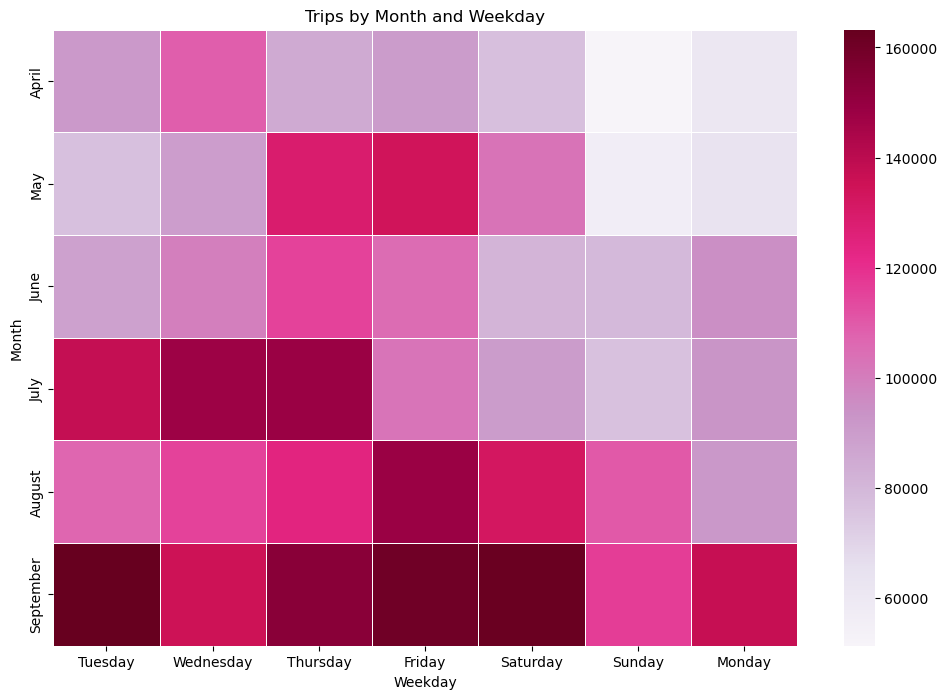

In [20]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= cm.PuRd, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

### Spatial Visualization

In [21]:
#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

### Scatter visualization

By eliminating the duplicates in latitude and longitude for our initial visualisation, we may lower the amount of processing power required.

In [22]:
df_reduced = df.drop_duplicates(['Lat','Lon'])

In [23]:
ratio_reduction = round((count_rows(df) - count_rows(df_reduced))/count_rows(df) * 100)
print('The dataset has been reduced by {}%'.format(ratio_reduction))

The dataset has been reduced by 87%


In [24]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']

### Spacial Animation

<IPython.core.display.Javascript object>


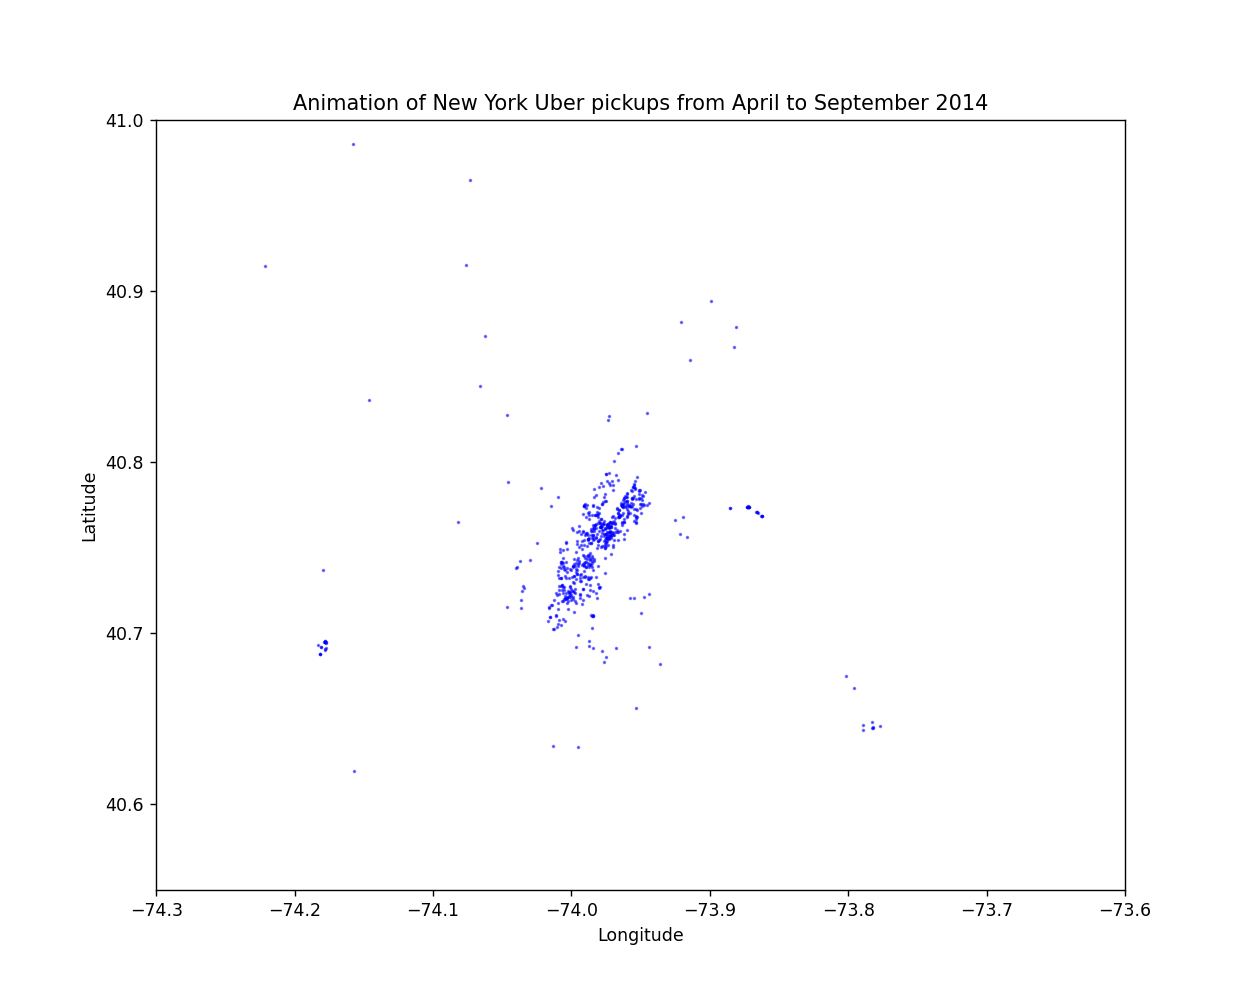

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(xlim=(left, right), ylim=(bottom, top))

dot, = ax.plot([], [], '.', ms=2, alpha=.5, color='blue')
# initialization function
def init():
    dot.set_data([], [])
    return dot,

# lists to store x and y axis points
x_data, y_data = [], []
# animation function
def animate(i):
    x = Longitudes_reduced.iloc[i]
    y = Latitudes_reduced.iloc[i]

    x_data.append(x)
    y_data.append(y)
    dot.set_data(x_data, y_data)
    return dot,

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Animation of New York Uber pickups from April to September 2014')

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=df_reduced.shape[0], interval=1, blit=True)

plt.show()


### A few moments later

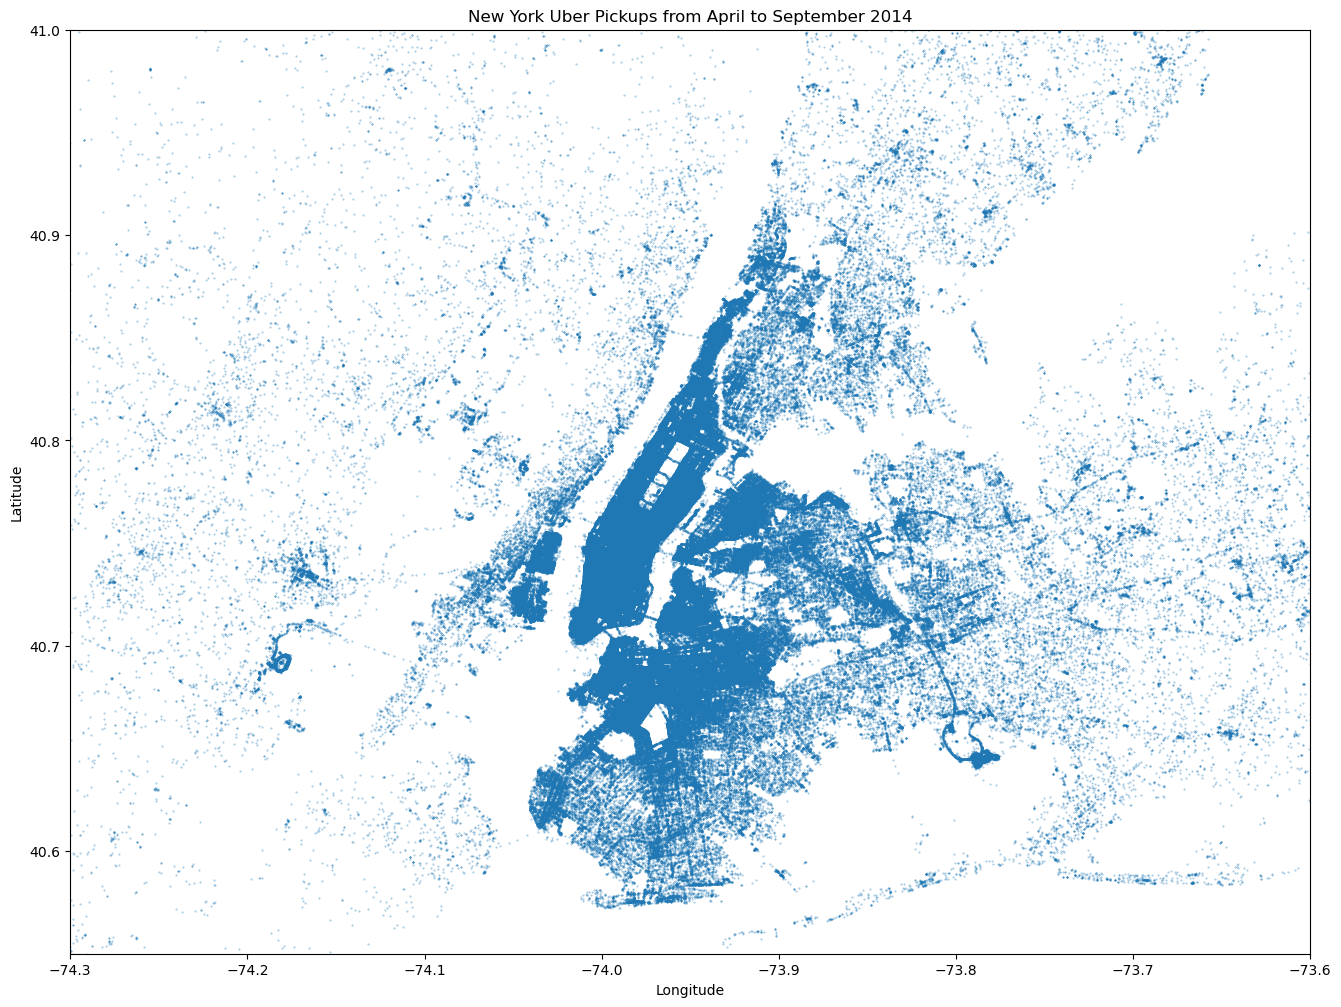

In [26]:
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()

### Heatmap visualization

This visualization is more demanding in processing resources, since we can't utilise the reduction dataset if we want to get the number of pickups in the heatmap.

The spatial heatmap will be made with Basemap.



In [27]:
!pip install basemap

In [28]:
from mpl_toolkits.basemap import Basemap

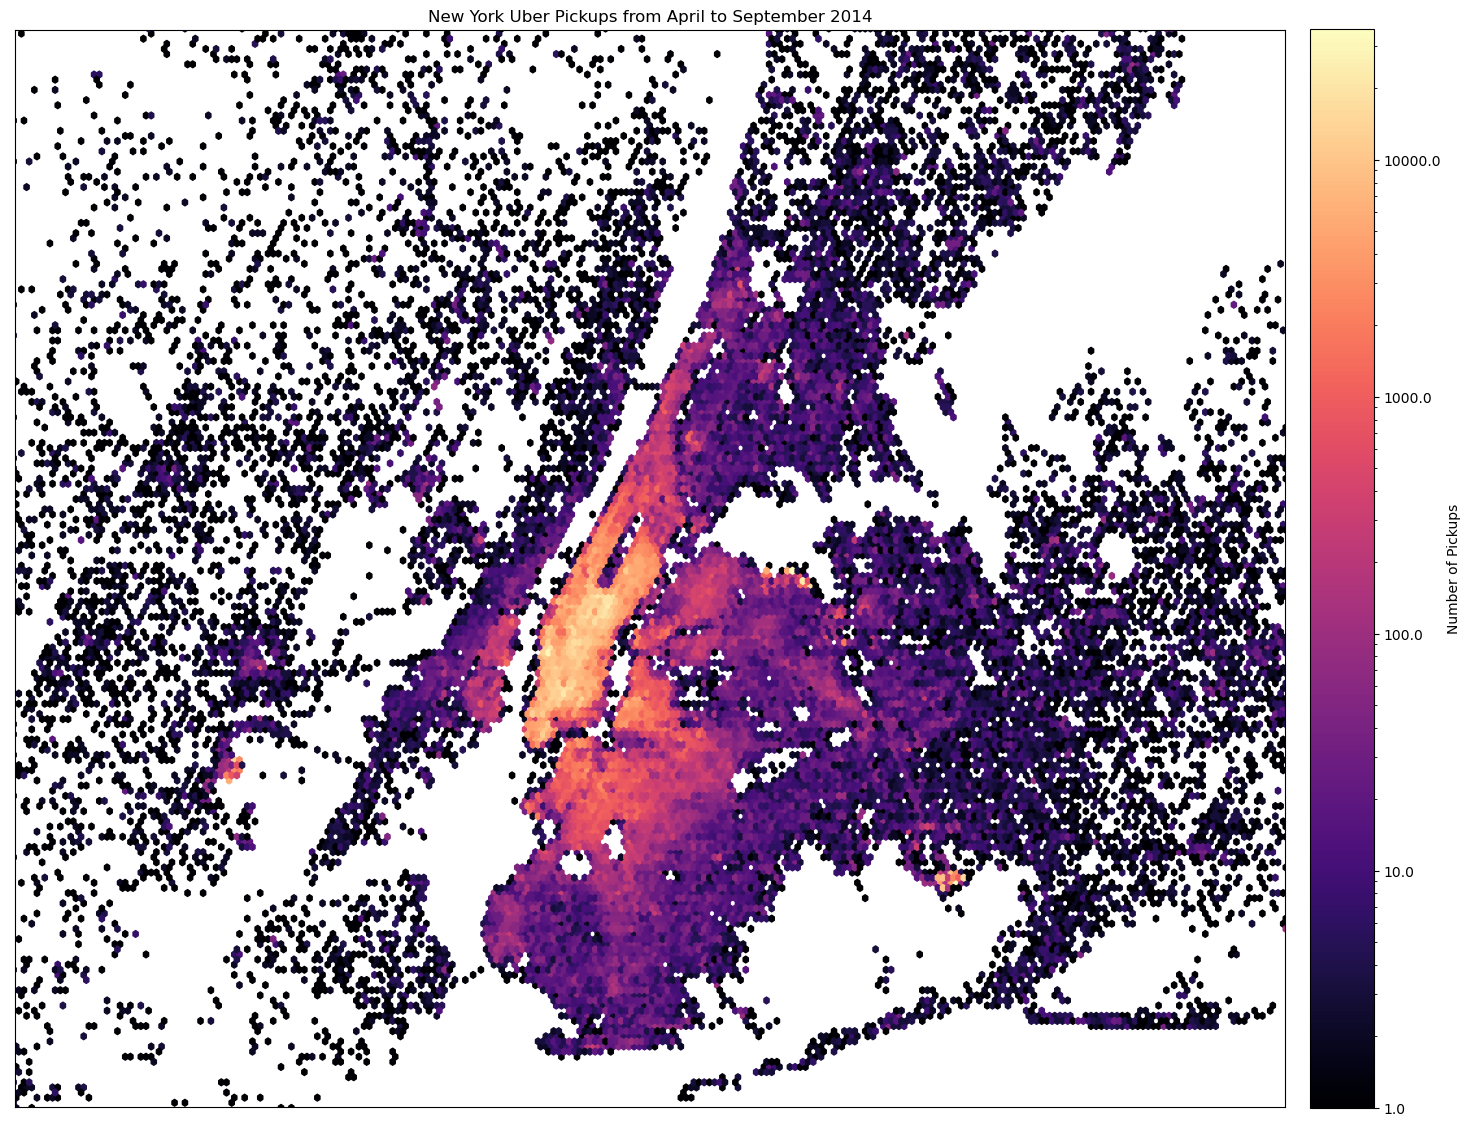

In [29]:
plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')

#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.magma)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');

#### Examining the outcomes
Based on our spatial visualisation, we can see that: Midtown to Lower Manhattan is where Uber makes the majority of its journeys in New York.
Brooklyn's Heights and Upper Manhattan came next.
And lastly, Brooklyn and Jersey City.
Our heatmap shows certain brighter areas, which correspond to the following: East Elmhurst's LaGuardia Airport.
Airport John F. Kennedy International.
Liberty International Airport in Newark.
We are aware that several airports have certain regulations regarding the locations where Uber-powered vehicles can pick up passengers. Given that a significant portion of Uber's business in New York is conducted at these three airports, it might be assumed that they have them.



In [30]:
!pip install folium

In [31]:
df_apr14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-apr14.csv")
df_may14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-may14.csv")
df_jun14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-jun14.csv")
df_jul14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-jul14.csv")
df_aug14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-aug14.csv")
df_sept14 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-sep14.csv")
df_janjun15 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-janjune-15.csv")


dfs_to_concat = [df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sept14]

# Concatenate DataFrames along rows (axis=0) and reset index
df1 = pd.concat(dfs_to_concat, ignore_index=True)

# Display the resulting DataFrame
print(df1)


                  Date/Time      Lat      Lon    Base
0          4/1/2014 0:11:00  40.7690 -73.9549  B02512
1          4/1/2014 0:17:00  40.7267 -74.0345  B02512
2          4/1/2014 0:21:00  40.7316 -73.9873  B02512
3          4/1/2014 0:28:00  40.7588 -73.9776  B02512
4          4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                     ...      ...      ...     ...
4534322  9/30/2014 22:57:00  40.7668 -73.9845  B02764
4534323  9/30/2014 22:57:00  40.6911 -74.1773  B02764
4534324  9/30/2014 22:58:00  40.8519 -73.9319  B02764
4534325  9/30/2014 22:58:00  40.7081 -74.0066  B02764
4534326  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[4534327 rows x 4 columns]


In [32]:
df1.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [33]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [34]:
df1 = df1.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df1['Date_time'] = pd.to_datetime(df1['Date_time'])

#Adding usufull colomns
df1['Month'] = df['Date_time'].dt.month_name()
df1['Weekday'] = df['Date_time'].dt.day_name
df1['Day'] = df['Date_time'].dt.day
df1['Hour'] = df['Date_time'].dt.hour
df1['Minute'] = df['Date_time'].dt.minute

In [35]:

df1.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,<bound method PandasDelegate._add_delegate_acc...,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,<bound method PandasDelegate._add_delegate_acc...,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,<bound method PandasDelegate._add_delegate_acc...,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,<bound method PandasDelegate._add_delegate_acc...,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,<bound method PandasDelegate._add_delegate_acc...,1,0,33


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [37]:
df1.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,NaN,NaN,NaN,5,6,1,NaN,NaN,NaN
top,NaN,NaN,NaN,B02617,September,<bound method PandasDelegate._add_delegate_acc...,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458853,1028136,4534327,NaN,NaN,NaN
mean,2014-07-11 18:50:50.578151424,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
min,2014-04-01 00:00:00,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2014-05-28 15:18:00,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01
50%,2014-07-17 14:45:00,4.074220e+01,-7.398340e+01,NaN,NaN,NaN,1.600000e+01,1.500000e+01,2.900000e+01
75%,2014-08-27 21:55:00,4.076100e+01,-7.396530e+01,NaN,NaN,NaN,2.300000e+01,1.900000e+01,4.400000e+01
max,2014-09-30 22:59:00,4.211660e+01,-7.206660e+01,NaN,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


In [38]:
df_hour_grouped = df1.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


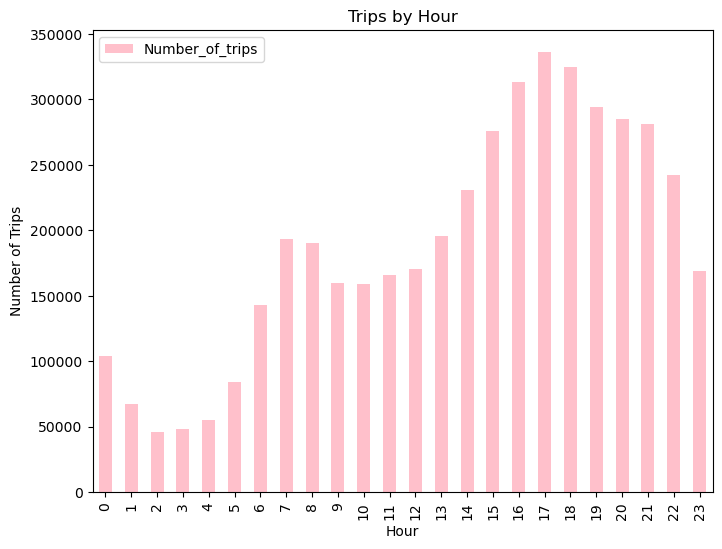

In [39]:
df_hour.plot(kind='bar', figsize=(8,6), color='pink')

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

In [40]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


We note that there is a surge in the number of trips at 17:00, and the number is higher between 16:00 and 18:00. It coincides with 16:30, the end of the workday in the United States, when employees leave for the day.
It is safe to say that workers make up the bulk of Uber's customer base.



### Trips by Month

In [41]:
#Grouping by Month 
df_month_grouped = df1.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


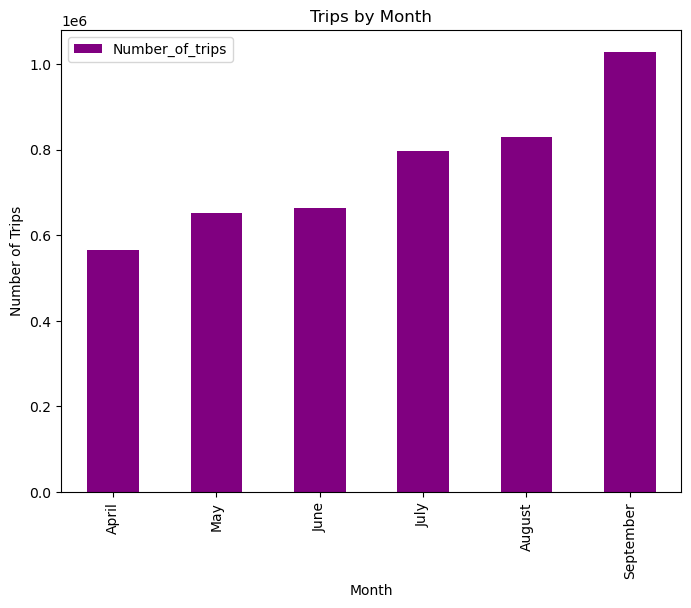

In [42]:
df_month.plot(kind='bar', figsize=(8,6), color='purple')

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

In [43]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 24 %.


In [44]:
#Grouping by Weekday
df_weekday_grouped = df1.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

,Number_of_trips
Weekday,
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x000001E659278DC0>>,4534327


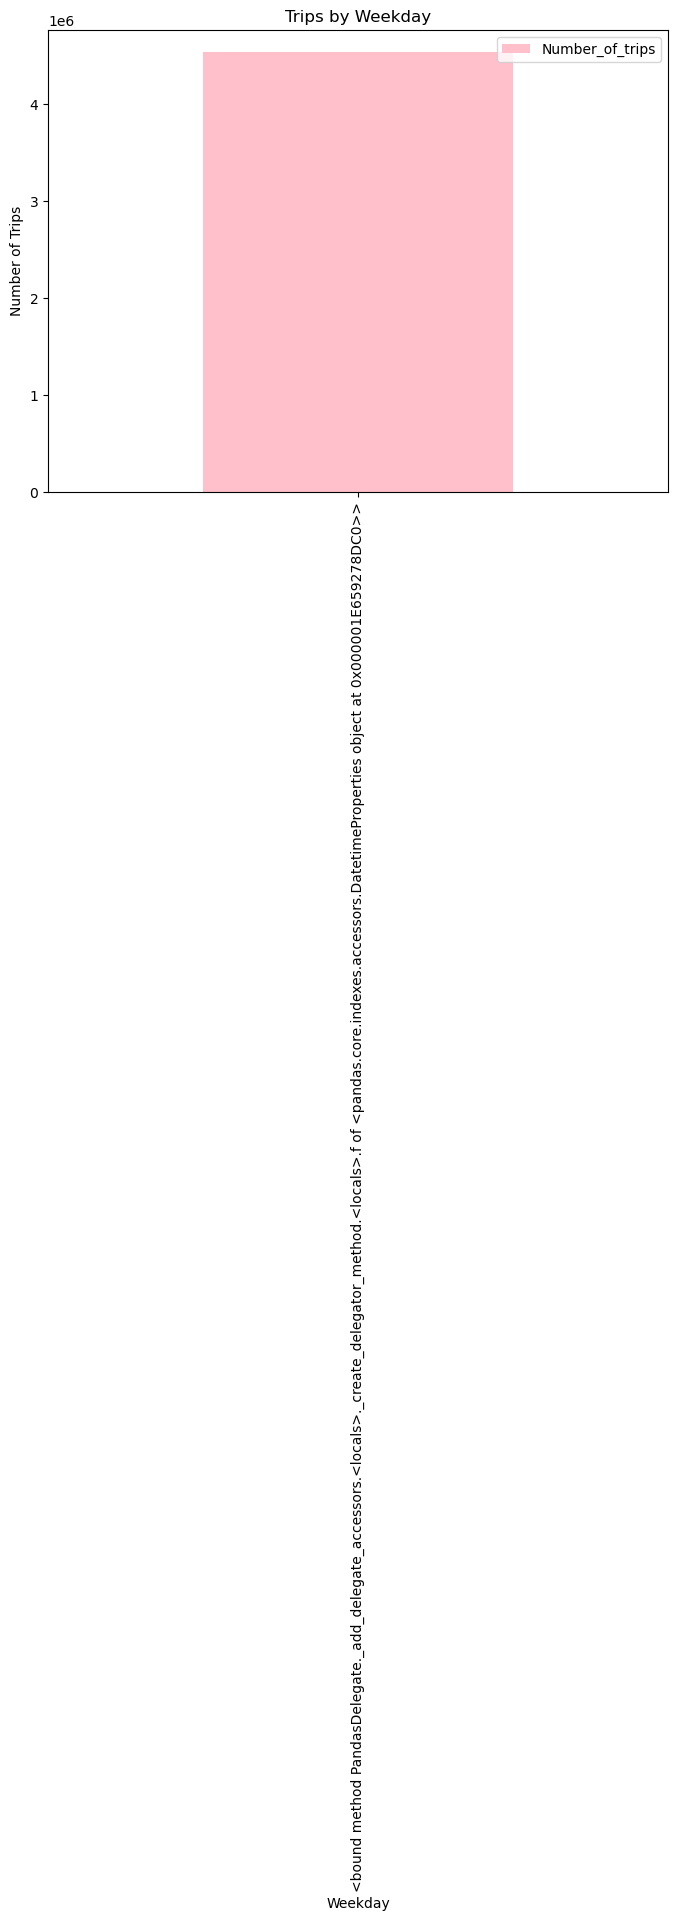

In [45]:
df_weekday.plot(kind='bar', figsize=(8,6), color='pink')

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

In [46]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 4534327 trip, that corresponds to <bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x000001E659278DC0>>.


It cannot be said that more people use Uber on workdays than on weekends, as there is only a 19.6% ratio between workdays and weekends and few rides on Mondays.
To understand why there are so few journeys on Mondays, we need to do further research.

In [47]:
#Grouping by Day
df_day_grouped = df1.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


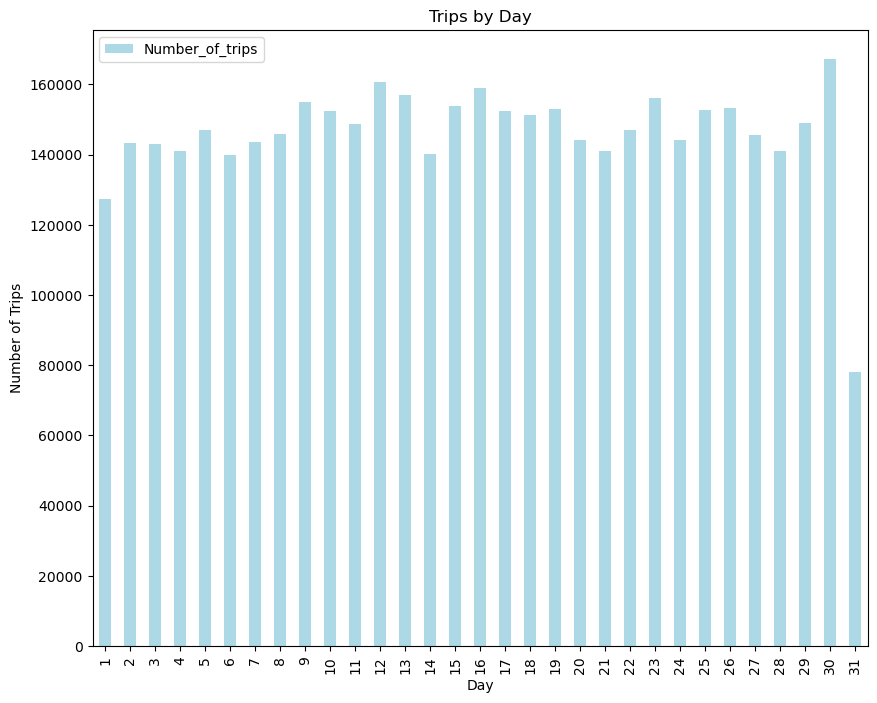

In [48]:
df_day.plot(kind='bar', figsize=(10,8), color='lightblue')

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

Examining the outcomes
Because April, June, and September have 30 days, there are much fewer trips on day 31 than there are on the other days.
The thirty is the day with the most trips. There isn't much difference every day.


In [49]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [50]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [51]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [52]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


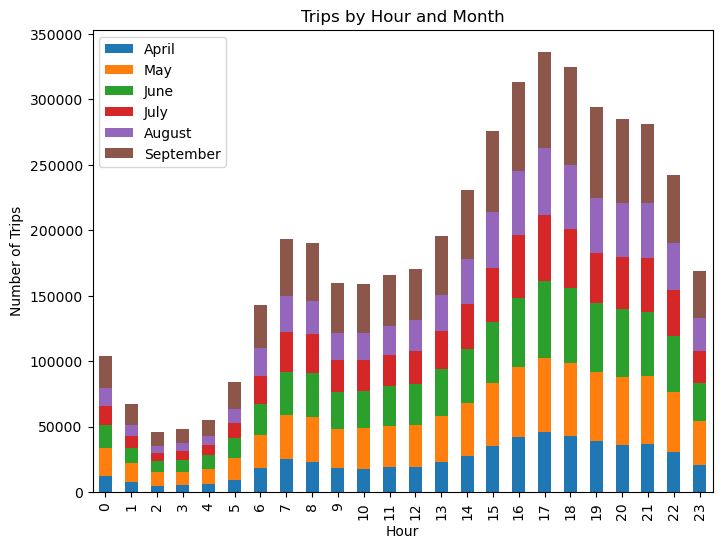

In [53]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True )

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

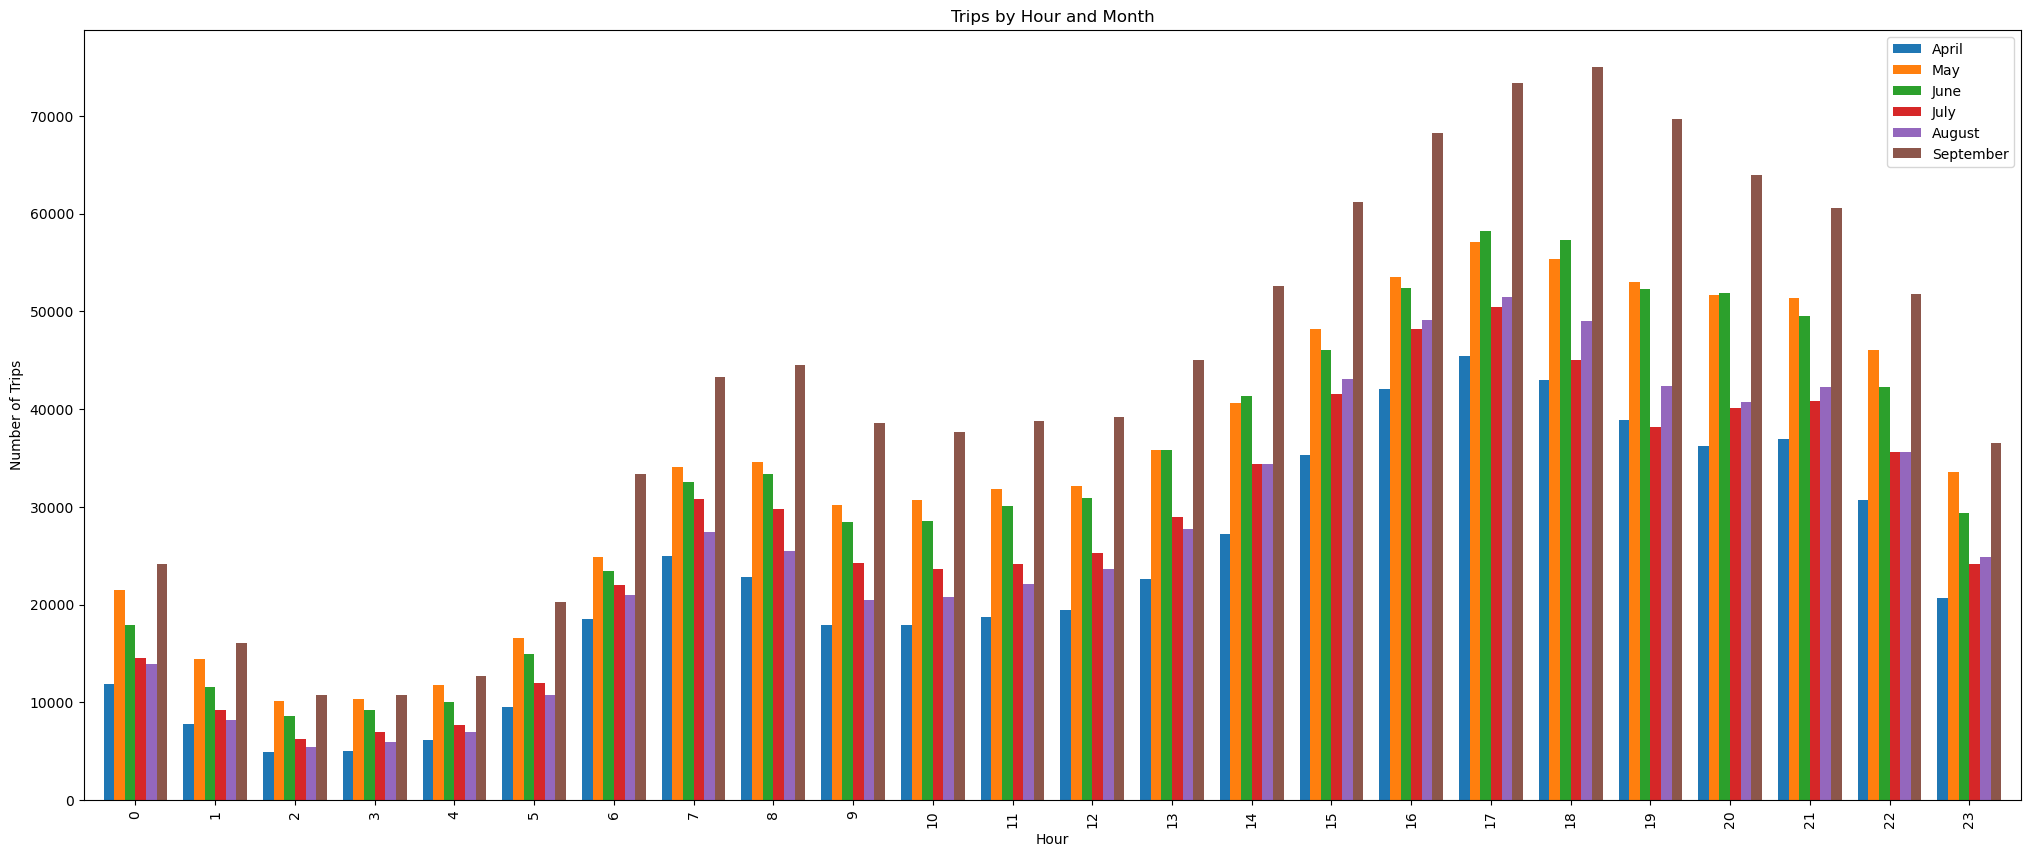

In [54]:
df_hour_month.plot(kind='bar', figsize=(25,10),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

In [55]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 

df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [56]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174


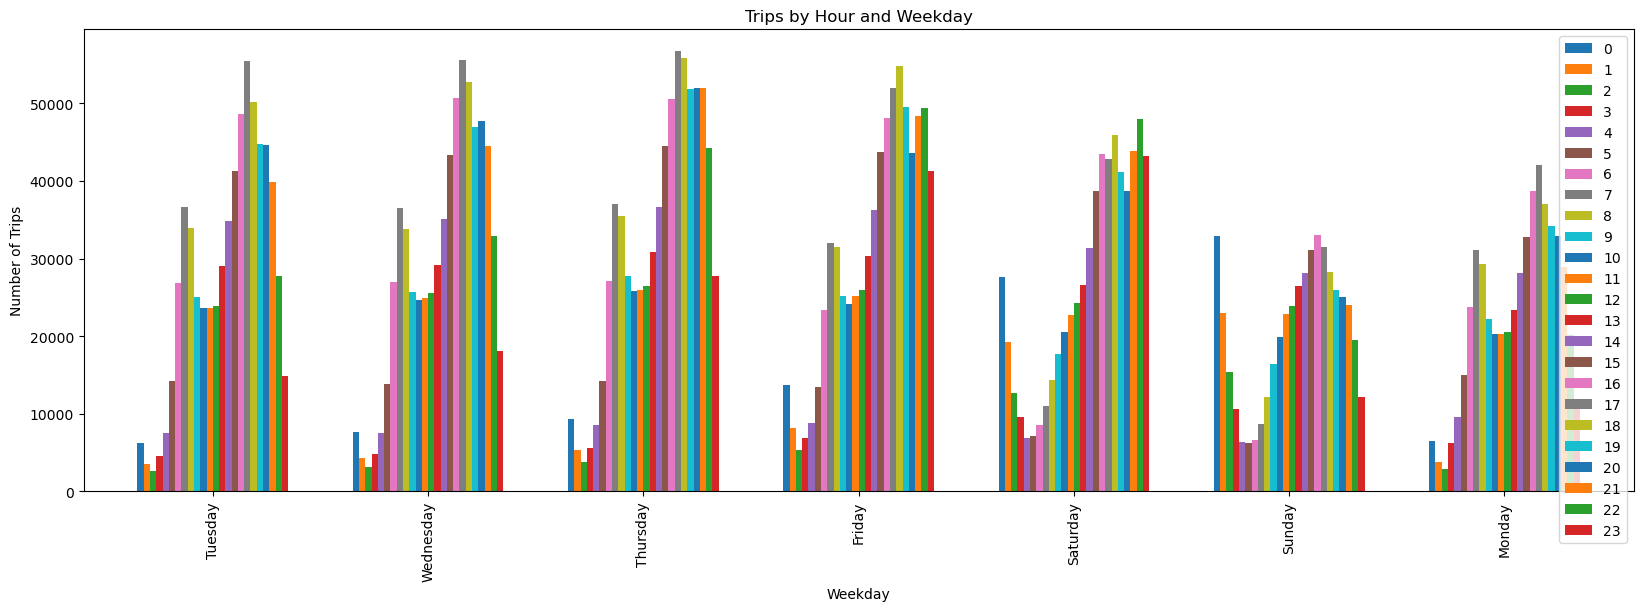

In [57]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

Examining the outcomes
During the working day, we see a pulse between 7:00 and 8:00, which is the hour when workers report for duty. On weekends, this pulse is absent.
Simultaneously, we observe that the number of travels around midnight, 1:00, and 2:00 on weekends is higher than on weekdays.



In [58]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [59]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


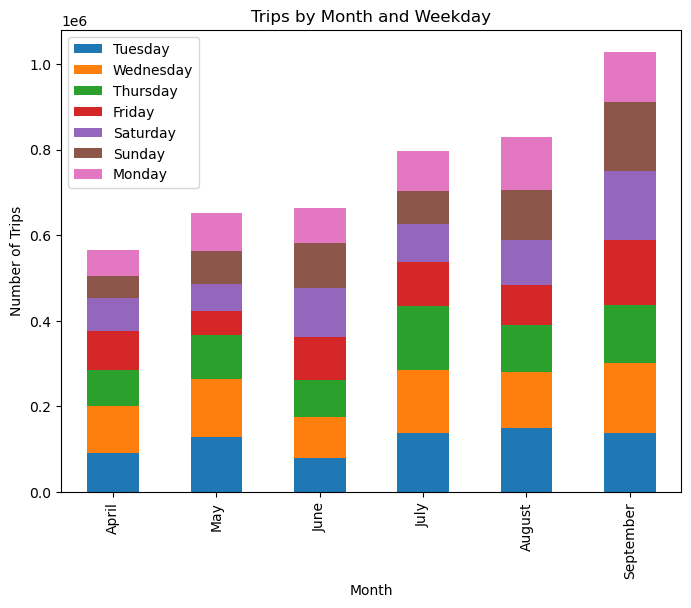

In [60]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

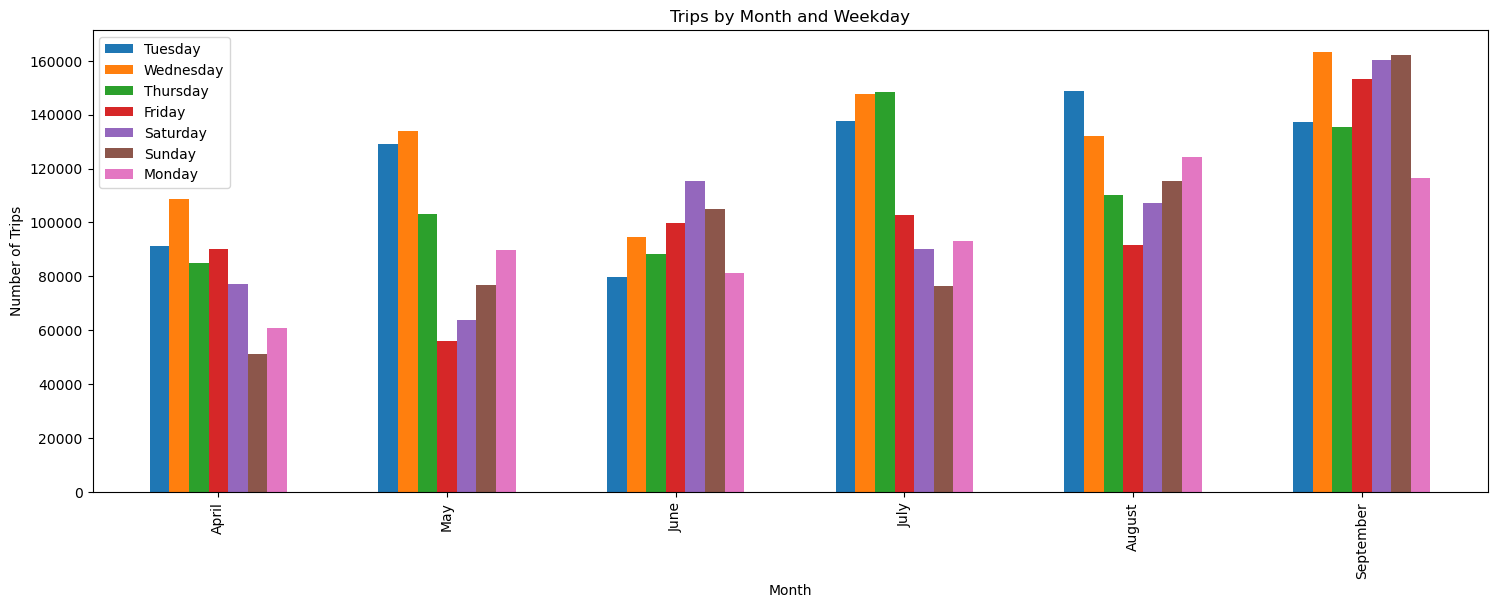

In [61]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

#### In a synopsis
We obtained the following facts by analysing the 2014 Uber Pickups in New York City data set:
Demand peaks at 17:00.
Employees are the primary clientele.
a measure of Uber's progress between April and September.
On weekdays, people often utilise Uber to get to work between 7:00 and 8:00.
On weekends, Uber is typically used late into the night, close to midnight.
We ought to look into the reason for the lower uber usage on Mondays compared to other workdays.
In order to extract more insights, we intend to use more specialised technologies in the future, such machine learning algorithms and heatmaps.



In [82]:
!pip install geopandas shapely matplotlib

     ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 1.6 MB/s eta 0:00:00


C:\Users\DELL\AppData\Local\Temp\ipykernel_19336\2985906527.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


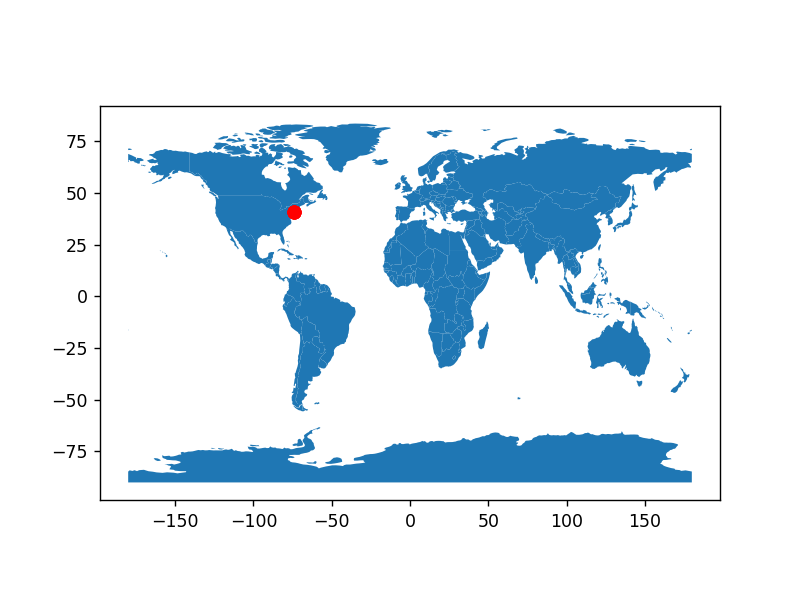

In [84]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Replace latitude and longitude with your actual data
latitude = [40.7690, 40.7267, 40.7316, 40.7588, 40.7594]
longitude = [-73.9549, -74.0345, -73.9873, -73.9776, -73.9722]

# Create a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(longitude, latitude)]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Load world map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
ax = world.plot()

# Plot your GeoDataFrame on top
gdf.plot(ax=ax, color='red', marker='o', markersize=50)

plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Replace latitude and longitude with your actual data
latitude = [40.7690, 40.7267, 40.7316, 40.7588, 40.7594]
longitude = [-73.9549, -74.0345, -73.9873, -73.9776, -73.9722]

# Create a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(longitude, latitude)]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Load world map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
ax = world.plot()

# Plot your GeoDataFrame on top
gdf.plot(ax=ax, color='red', marker='o', markersize=50)

plt.show()


In [90]:
df_janjun15 = pd.read_csv(r"C:\Users\DELL\Desktop\Skill-lync\INTERNSHIPS\Skill-Lync Internship\Project 3 Uber Pickup In New York City\uber-raw-data-janjune-15.csv")
print(df_janjun15)

        Dispatching_base_num       Date/Time Affiliated_base_num  locationID
0                     B02617   17-05-15 9:47              B02617         141
1                     B02617   17-05-15 9:47              B02617          65
2                     B02617   17-05-15 9:47              B02617         100
3                     B02617   17-05-15 9:47              B02774          80
4                     B02617   17-05-15 9:47              B02617          90
...                      ...             ...                 ...         ...
1048570               B02764  21-05-15 18:07              B02682          52
1048571               B02764  21-05-15 18:07              B02764         230
1048572               B02764  21-05-15 18:07              B02788         246
1048573               B02764  21-05-15 18:07              B02764         107
1048574               B02764  21-05-15 18:07              B02764         100

[1048575 rows x 4 columns]


In [91]:
df_janjun15.head()

,Dispatching_base_num,Date/Time,Affiliated_base_num,locationID
0,B02617,17-05-15 9:47,B02617,141
1,B02617,17-05-15 9:47,B02617,65
2,B02617,17-05-15 9:47,B02617,100
3,B02617,17-05-15 9:47,B02774,80
4,B02617,17-05-15 9:47,B02617,90


In [92]:
df_janjun15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Dispatching_base_num  1048575 non-null  object
 1   Date/Time             1048575 non-null  object
 2   Affiliated_base_num   1036592 non-null  object
 3   locationID            1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [93]:
df_janjun15.describe(include = 'all')

,Dispatching_base_num,Date/Time,Affiliated_base_num,locationID
count,1048575,1048575,1036592,1.048575e+06
unique,4,89270,254,NaN
top,B02764,17-06-15 19:26,B02764,NaN
freq,521996,112,379229,NaN
mean,NaN,NaN,NaN,1.523488e+02
std,NaN,NaN,NaN,7.146124e+01
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,9.500000e+01
50%,NaN,NaN,NaN,1.580000e+02
75%,NaN,NaN,NaN,2.300000e+02


In [97]:
df_janjun15 = df_janjun15.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df_janjun15['Date_time'] = pd.to_datetime(df_janjun15['Date_time'])

#Adding usufull colomns
df_janjun15['Month'] = df_janjun15['Date_time'].dt.month_name()
df_janjun15['Weekday'] = df_janjun15['Date_time'].dt.day_name()
df_janjun15['Day'] = df_janjun15['Date_time'].dt.day
df_janjun15['Hour'] = df_janjun15['Date_time'].dt.hour
df_janjun15['Minute'] = df_janjun15['Date_time'].dt.minute

C:\Users\DELL\AppData\Local\Temp\ipykernel_19336\219207561.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_janjun15['Date_time'] = pd.to_datetime(df_janjun15['Date_time'])


In [99]:
df_janjun15.head()

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,17,9,47


In [100]:
df_janjun15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Dispatching_base_num  1048575 non-null  object        
 1   Date_time             1048575 non-null  datetime64[ns]
 2   Affiliated_base_num   1036592 non-null  object        
 3   locationID            1048575 non-null  int64         
 4   Month                 1048575 non-null  object        
 5   Weekday               1048575 non-null  object        
 6   Day                   1048575 non-null  int32         
 7   Hour                  1048575 non-null  int32         
 8   Minute                1048575 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(4)
memory usage: 60.0+ MB


In [101]:
df_janjun15.describe(include = 'all')

,Dispatching_base_num,Date_time,Affiliated_base_num,locationID,Month,Weekday,Day,Hour,Minute
count,1048575,1048575,1036592,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06
unique,4,NaN,254,NaN,12,7,NaN,NaN,NaN
top,B02764,NaN,B02764,NaN,May,Tuesday,NaN,NaN,NaN
freq,521996,NaN,379229,NaN,259001,194260,NaN,NaN,NaN
mean,NaN,2015-05-01 15:45:21.885874432,NaN,1.523488e+02,NaN,NaN,1.627986e+01,1.395629e+01,2.938822e+01
min,NaN,2015-01-01 00:00:00,NaN,1.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2015-02-22 23:53:00,NaN,9.500000e+01,NaN,NaN,4.000000e+00,9.000000e+00,1.400000e+01
50%,NaN,2015-05-06 21:44:00,NaN,1.580000e+02,NaN,NaN,1.800000e+01,1.500000e+01,2.900000e+01
75%,NaN,2015-06-14 00:08:00,NaN,2.300000e+02,NaN,NaN,2.400000e+01,1.900000e+01,4.400000e+01
max,NaN,2015-12-02 23:59:00,NaN,2.650000e+02,NaN,NaN,3.100000e+01,2.300000e+01,5.900000e+01


In [102]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

In [103]:
#Creating the hour and day dataframe
df_hour_day = df_janjun15.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

Day,1,2,3,4,5,6,13,14,15,16,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,2576.0,3268.0,821.0,5672.0,NaN,2464.0,198.0,2283.0,26.0,24.0,...,3322.0,1615.0,1240.0,1443.0,366.0,553.0,1997.0,2569.0,818.0,1009.0
1,1906.0,2139.0,467.0,3489.0,NaN,1652.0,117.0,1823.0,15.0,14.0,...,2270.0,678.0,1306.0,1090.0,145.0,445.0,1088.0,1864.0,431.0,661.0
2,1855.0,1356.0,266.0,2221.0,NaN,832.0,71.0,1385.0,5.0,6.0,...,1550.0,453.0,944.0,795.0,1609.0,293.0,1446.0,1284.0,263.0,405.0
3,1533.0,958.0,175.0,1553.0,262.0,NaN,43.0,920.0,1.0,3.0,...,981.0,318.0,700.0,539.0,486.0,232.0,1665.0,818.0,181.0,245.0
4,1121.0,923.0,226.0,1687.0,442.0,NaN,62.0,732.0,3.0,4.0,...,830.0,335.0,599.0,332.0,185.0,420.0,1381.0,733.0,298.0,234.0


<IPython.core.display.Javascript object>


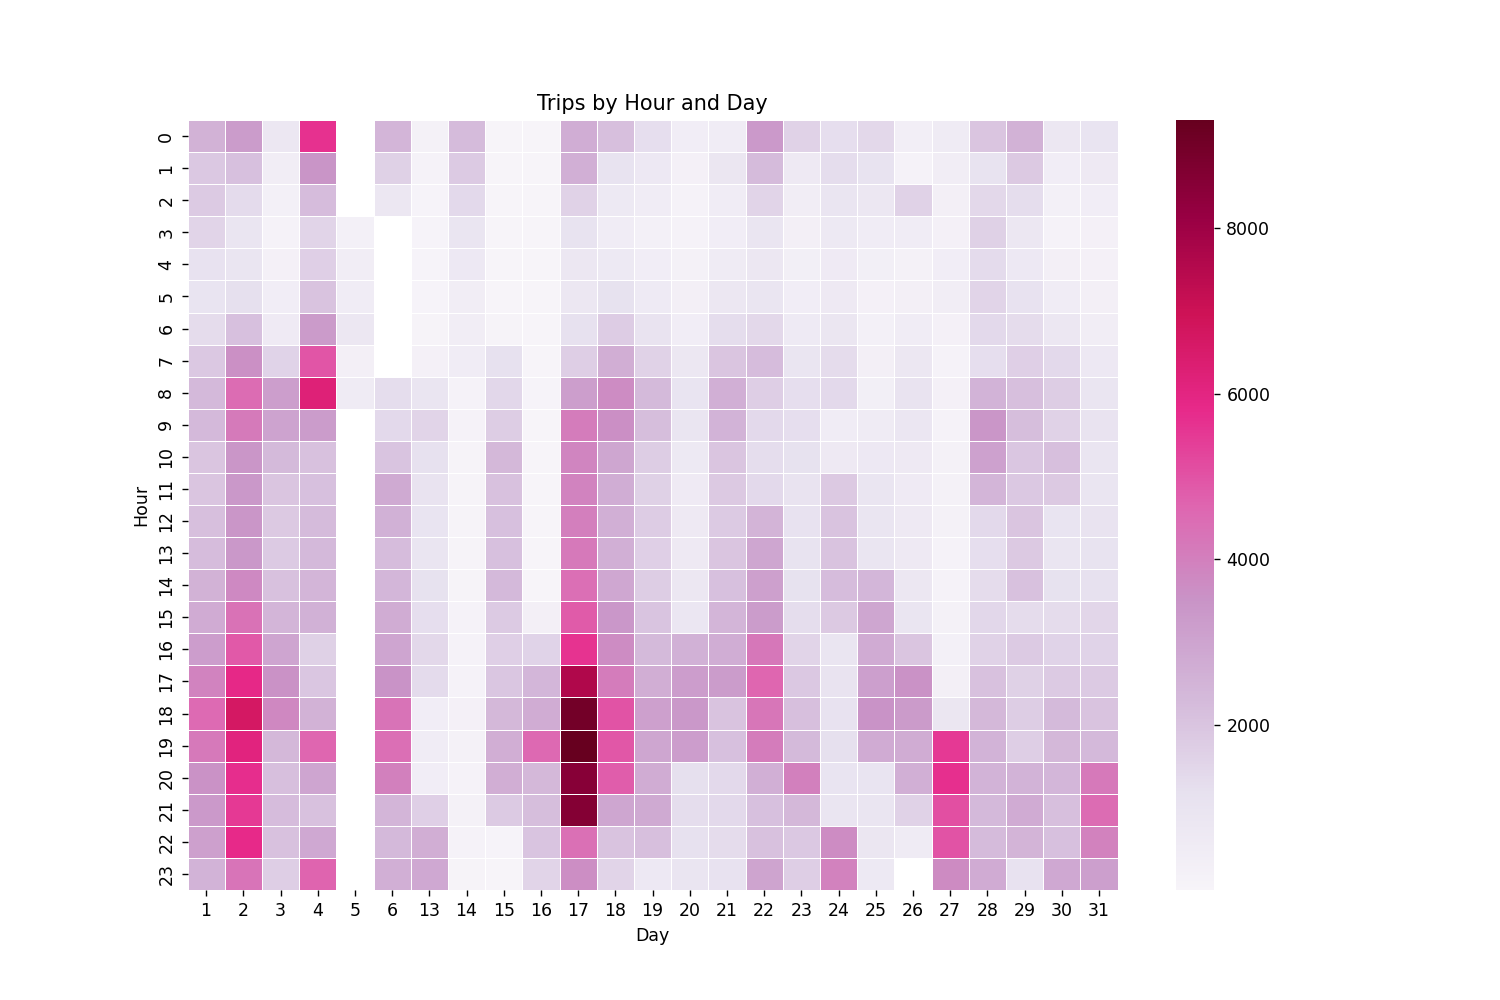

In [104]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.PuRd, linewidth = .5)
ax.set(title="Trips by Hour and Day");

In [105]:
df_day_month = df_janjun15.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

Month,May,January,March,June,July,April,February,August,October,November,September,December
Day,,,,,,,,,,,,
17,36255.0,2421.0,19108.0,42192.0,NaN,1836.0,NaN,NaN,NaN,NaN,NaN,NaN
18,33360.0,937.0,NaN,21918.0,NaN,8188.0,NaN,NaN,NaN,NaN,NaN,NaN
28,3016.0,14204.0,15629.0,8093.0,NaN,6303.0,NaN,NaN,NaN,NaN,NaN,NaN
19,35532.0,5558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2644.0,14254.0,1467.0,3383.0,1046.0,1404.0,11360.0,7714.0,10730.0,12366.0,10367.0,14031.0


<IPython.core.display.Javascript object>


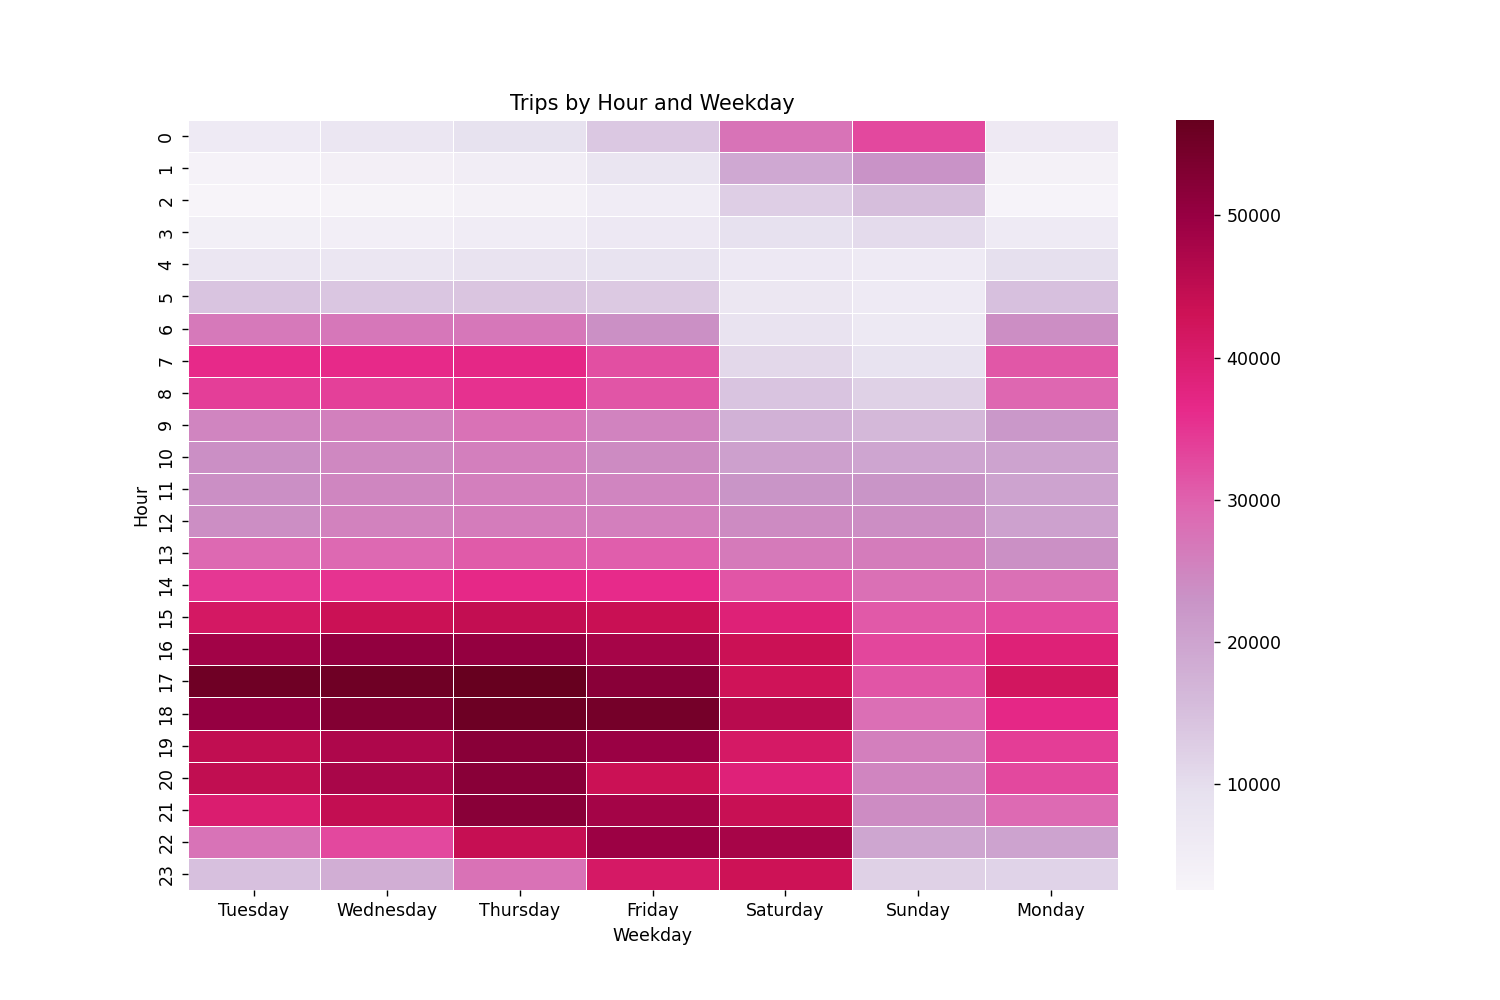

In [106]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.PuRd, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");